# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     667.6
Date:                Wed, 17 Dec 2025   Prob (F-statistic):           6.53e-38
Time:                        14:36:24   Log-Likelihood:                -6.5233
No. Observations:                  50   AIC:                             21.05
Df Residuals:                      46   BIC:                             28.69
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0956      0.098     52.013      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.64496393  5.0991233   5.51637837  5.87090704  6.14620628  6.3378035
  6.45399142  6.51446559  6.54708846  6.58331166  6.65300859  6.77956629
  6.97604304  7.24302292  7.56851981  7.92994672  8.29782675  8.64063606
  8.92998315  9.1452735   9.2770932   9.32875561  9.31575702  9.26323062
  9.20181718  9.16263091  9.17214743  9.24785392  9.39537605  9.60755363
  9.86561711 10.14227126 10.40617977 10.6271137  10.78091799 10.85348008
 10.84304857 10.76052098 10.62765327 10.47348547 10.32957041 10.22478974
 10.18060872 10.20754955 10.30346262 10.45387965 10.6343908  10.81465516
 10.96338565 11.05348941]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[11.05788352 10.93762855 10.71130542 10.42125778 10.12322473  9.87269398
  9.71131653  9.65670903  9.69814063  9.79916025]


## Plot comparison

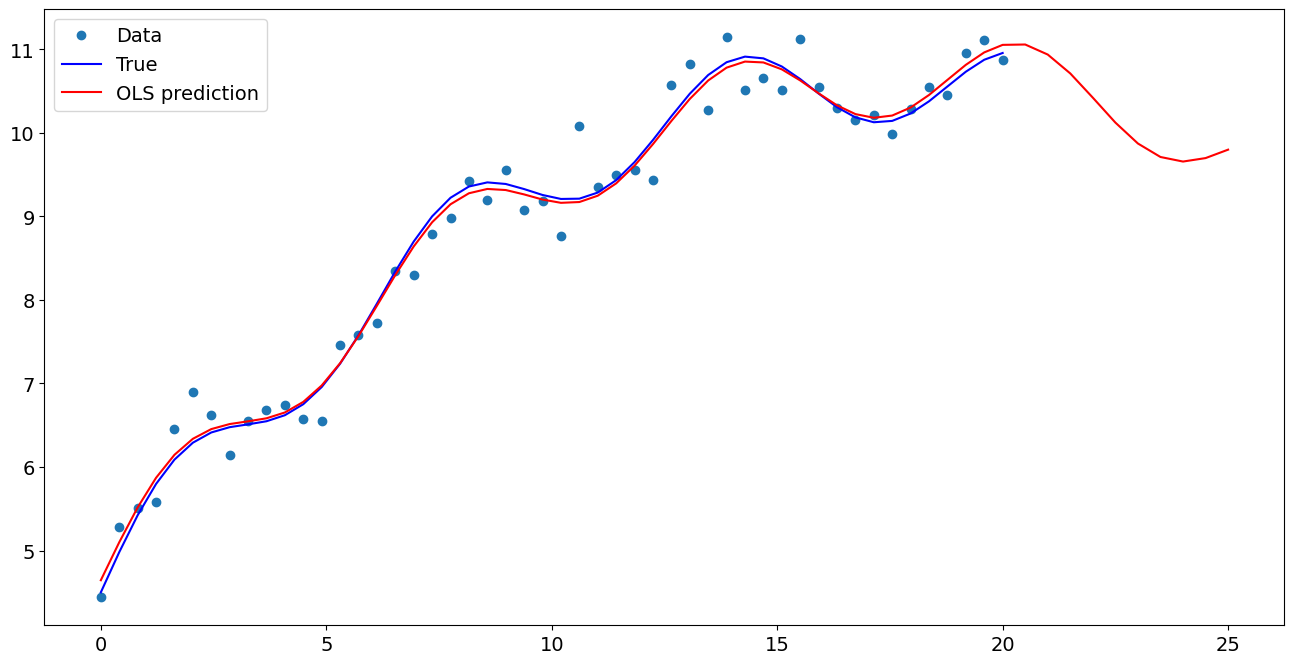

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.095574
x1                  0.479042
np.sin(x1)          0.473808
I((x1 - 5) ** 2)   -0.018024
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    11.057884
1    10.937629
2    10.711305
3    10.421258
4    10.123225
5     9.872694
6     9.711317
7     9.656709
8     9.698141
9     9.799160
dtype: float64